# TODOs

**EDA**
- Check whether features and sales dates match
- Check dates occurrences per store
- Plot features over time (with holidays)
- Plot sales over time (with holidays)
- Plot sales correlations

**Modelling Ideas**
- Implement evaluation metric
- Have benchmarks (random and maybe winner)
- train test split in time
- Use simple and complex model
- Explain the models










# Description


# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm, colors
sns.set(style='whitegrid')

# EDA

## Loading Data

In [3]:
base_path = '../data/'

In [4]:
stores = pd.read_csv(base_path + 'stores.csv')
features = pd.read_csv(base_path + 'features.csv')
train = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')

In [ ]:
holidays = features[features.IsHoliday==True].Date.unique()

## Dates

In [ ]:
features.Date = pd.to_datetime(features.Date)
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

In [98]:
set(features.Date).difference(set(train.Date).union(test.Date)),\
(set(train.Date).union(test.Date)).difference(set(features.Date))

(set(), set())

In [99]:
train.Date.max(), test.Date.min()

(Timestamp('2012-10-26 00:00:00'), Timestamp('2012-11-02 00:00:00'))

## Stores
The first dataset we look at is the stores dataset. It consists of 3 columns, **Store**, which is just the store identifier, **Type** and **Size**. There are 3 types of Stores: A, B and C. Moreover, the sizes are related to the types, where A have greater sizes, followed by B and C.
There is a total of 45 stores.

In [4]:
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [5]:
stores.Store.value_counts().value_counts()

1    45
Name: Store, dtype: int64

In [6]:
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

### Type

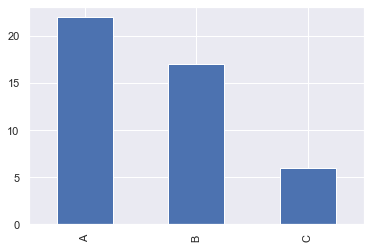

In [7]:
stores.Type.value_counts().plot.bar()

### Size

If we plot the Sizes distributions by store Types, we observe that they are obviously related.

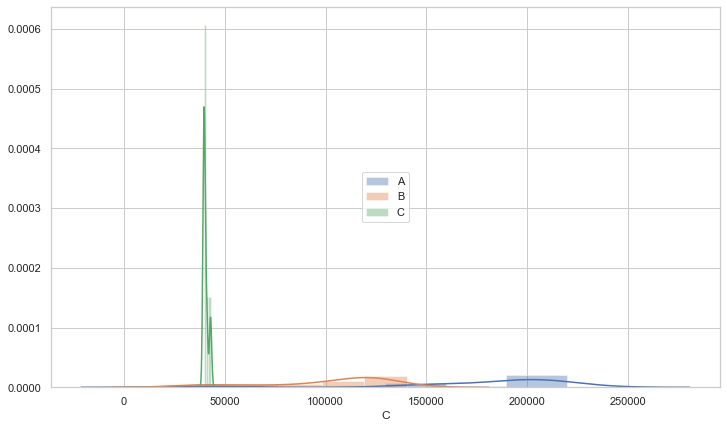

In [199]:
plt.figure(figsize=(12,6))
stores.groupby('Type').Size.apply(lambda x: sns.distplot(x,label=x.name))
plt.legend(loc='center')
plt.set_xlabel= 'bla'

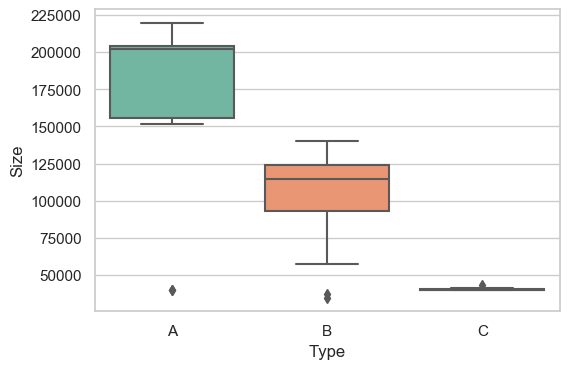

In [198]:
plt.figure(dpi=100)
sns.boxplot(x='Type', y='Size',data=stores, palette='Set2')

In [57]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

Text(0, 0.5, '# Dept')

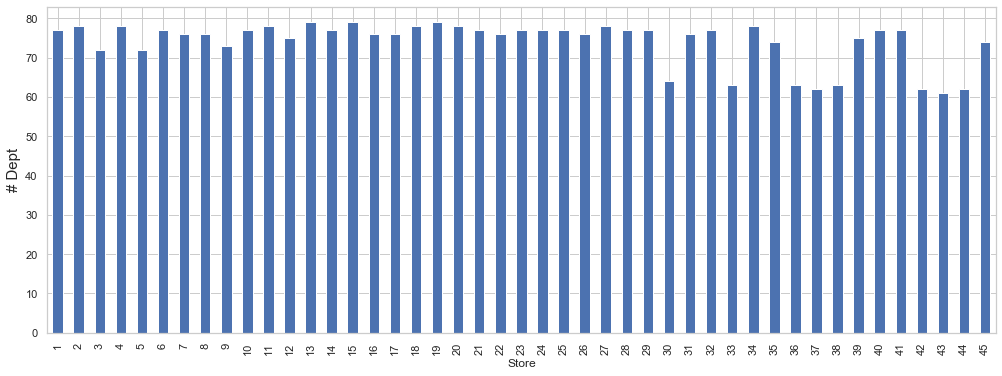

In [28]:
plt.figure(figsize=(17,6))
train.groupby('Store').Dept.nunique().plot.bar()
plt.ylabel('# Dept',fontsize=15)

## Features
As described in the page of the challenge, the features dataset consists of following columns:

- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- CPI - the consumer price index
- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week

**Holidays**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [49]:
features

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

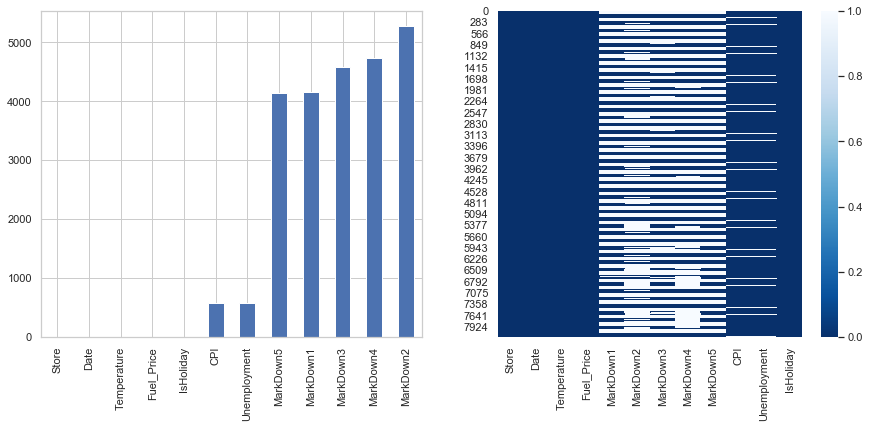

In [197]:
f, axs = plt.subplots(1,2,figsize=(15,6))
features.isna().sum().sort_values().plot.bar(ax=axs[0])
sns.heatmap(features.isna(),ax=axs[1], cmap='Blues_r')

In [92]:
(pd.crosstab(index=features.Store, columns = features.Date)>0).sum(axis=1).value_counts()

182    45
dtype: int64

In [96]:
def plot_time_evolution(df, col, group_col='Store',
                        date_col='Date', cmap='viridis', n_col=2,ax=None, **kwargs):
    if ax is None:
        f, ax = plt.subplots(1,1,figsize=(30,7))

    cmap = cm.get_cmap(cmap)
    norm = colors.Normalize(vmin=df[group_col].min(), vmax=df[group_col].max())

    _ = df.set_index(date_col)\
                .groupby(group_col)\
                [col]\
                .apply(lambda x: ax.plot(x,
                                          label=x.name, 
                                          c=cmap(norm(x.name)),
                                          alpha=0.7,
                                          **kwargs))

    ax.set_ylabel(col,fontsize=15)
    ax.legend(loc='upper right',ncol=n_col, bbox_to_anchor=(1.030, 1))

    _ = plt.xticks(rotation=90)
    
    return ax


def plot_holidays(holidays,ax=None):
    if ax is None:
        f, ax = plt.subplots(1,1)
    for d in holidays:
        ax.axvline(d, color='gray',linewidth=3,linestyle='--', alpha=0.7)
    return ax

In [9]:
features.Date = pd.to_datetime(features.Date)

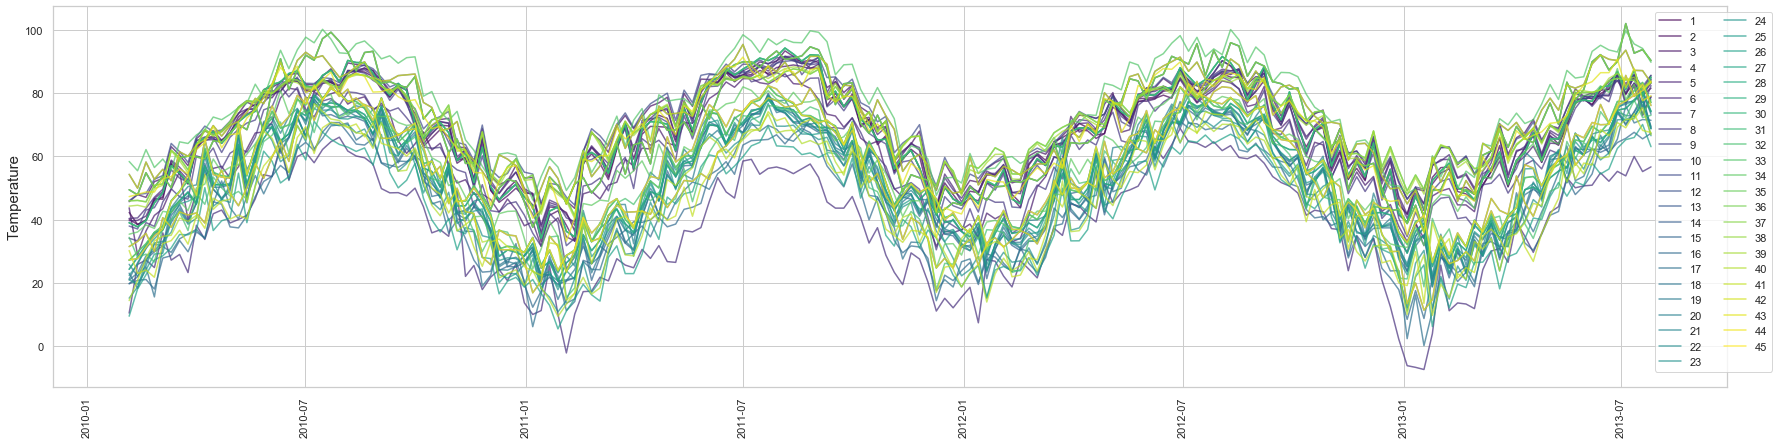

In [196]:
ax = plot_time_evolution(features,'Temperature')

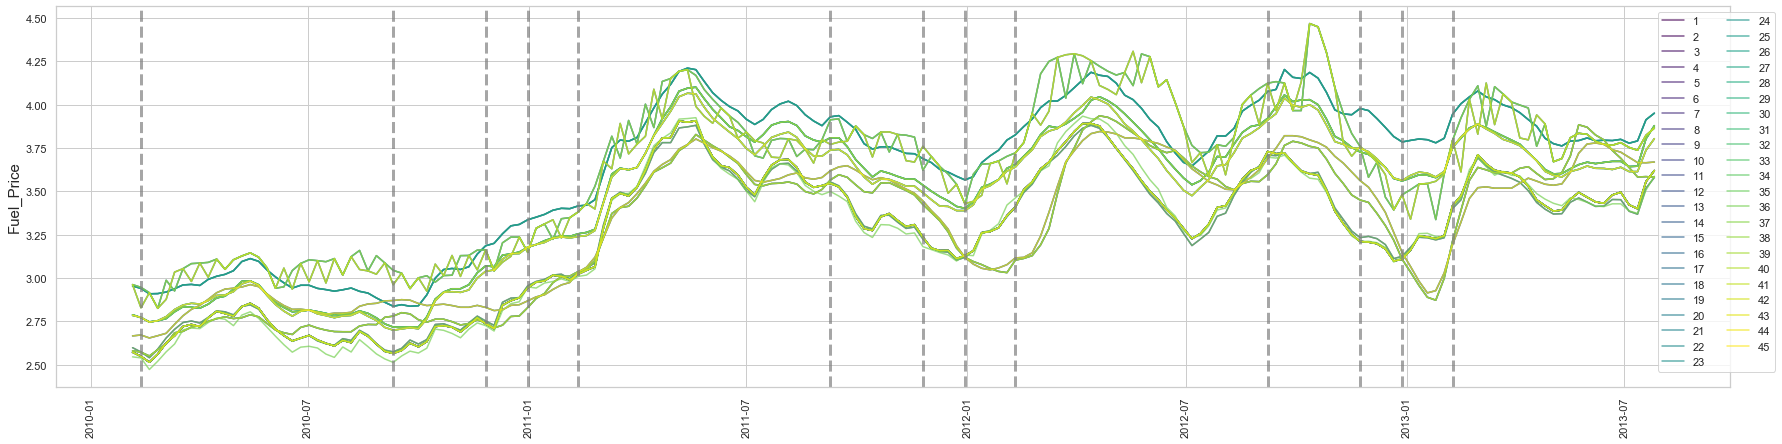

In [67]:
ax = plot_time_evolution(features,'Fuel_Price')
plot_holidays(holidays,ax=ax)

## Sales

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

In [14]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

In [17]:
train.Date.max()

Timestamp('2012-10-26 00:00:00')

### by Store

Store
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
17    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
23    AxesSubplot(0.125,0.125;0.775x0.755)
24   

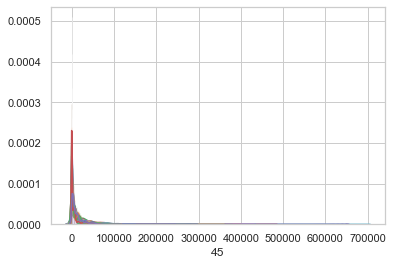

In [123]:
train.groupby('Store').Weekly_Sales.apply(sns.distplot)

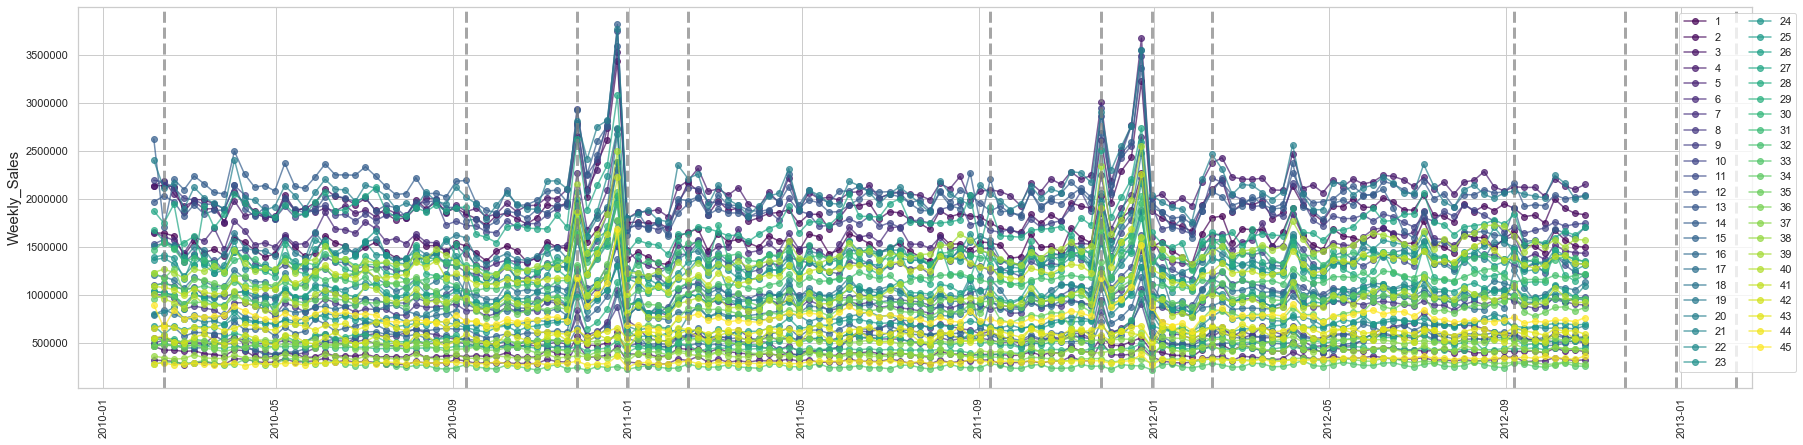

In [86]:
ax=plot_time_evolution(train.groupby(['Store','Date'])[['Weekly_Sales']]\
                       .sum().reset_index()
                       ,'Weekly_Sales', marker='o')
plot_holidays(holidays,ax=ax)

### by Departments

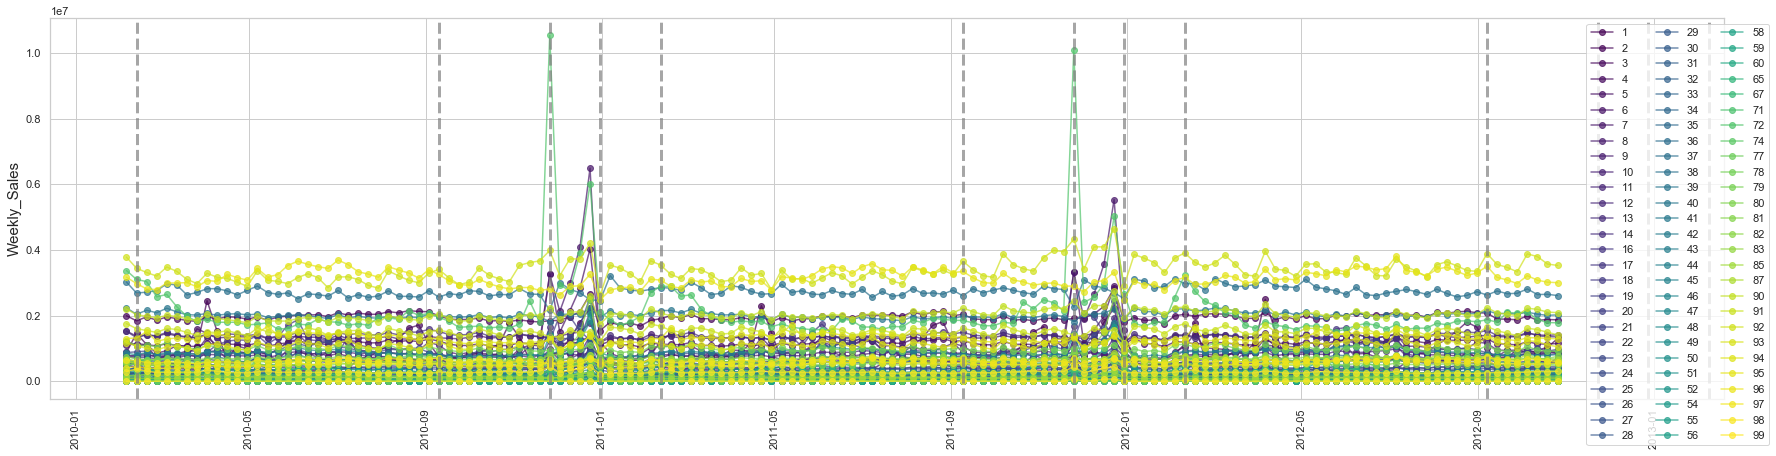

In [97]:
ax=plot_time_evolution(train.groupby(['Dept','Date'])[['Weekly_Sales']]\
                       .sum().reset_index()
                       ,'Weekly_Sales',group_col='Dept', marker='o',n_col=3)
plot_holidays(holidays,ax=ax)

In [91]:
(train.groupby(['Store','Date']).Weekly_Sales.sum().unstack()>0).all().all()

True

### merging

In [139]:
df_merged_train = train.merge(features.drop('IsHoliday',axis=1),on=['Store','Date'])\
                       .merge(stores,on=['Store'])

df_merged_test = test.merge(features.drop('IsHoliday',axis=1),on=['Store','Date'])\
                       .merge(stores,on=['Store'])

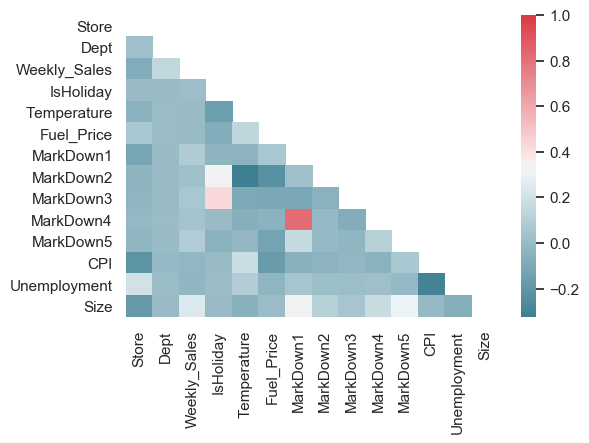

In [120]:
plt.figure(dpi=100)
corr = df_merged_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap)

In [126]:
df_merged_train

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     2 2010-02-05      50605.27      False        42.31   
2           1     3 2010-02-05      13740.12      False        42.31   
3           1     4 2010-02-05      39954.04      False        42.31   
4           1     5 2010-02-05      32229.38      False        42.31   
...       ...   ...        ...           ...        ...          ...   
421565     45    93 2012-10-26       2487.80      False        58.85   
421566     45    94 2012-10-26       5203.31      False        58.85   
421567     45    95 2012-10-26      56017.47      False        58.85   
421568     45    97 2012-10-26       6817.48      False        58.85   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  
0       211.096358         8.106    A  151315  
1       211.096358         8.106    A  151315  
2       211.096358         8.106    A  151315  
3       211.096358         8.106    A  151315  
4       211.096358         8.106    A  151315  
...            ...           ...  ...     ...  
421565  192.308899         8.667    B  118221  
421566  192.308899         8.667    B  118221  
421567  192.308899         8.667    B  118221  
421568  192.308899         8.667    B  118221  
421569  192.308899         8.667    B  118221  

[421570 rows x 16 columns]

CPU times: user 1min 20s, sys: 4.48 s, total: 1min 25s
Wall time: 1min 25s


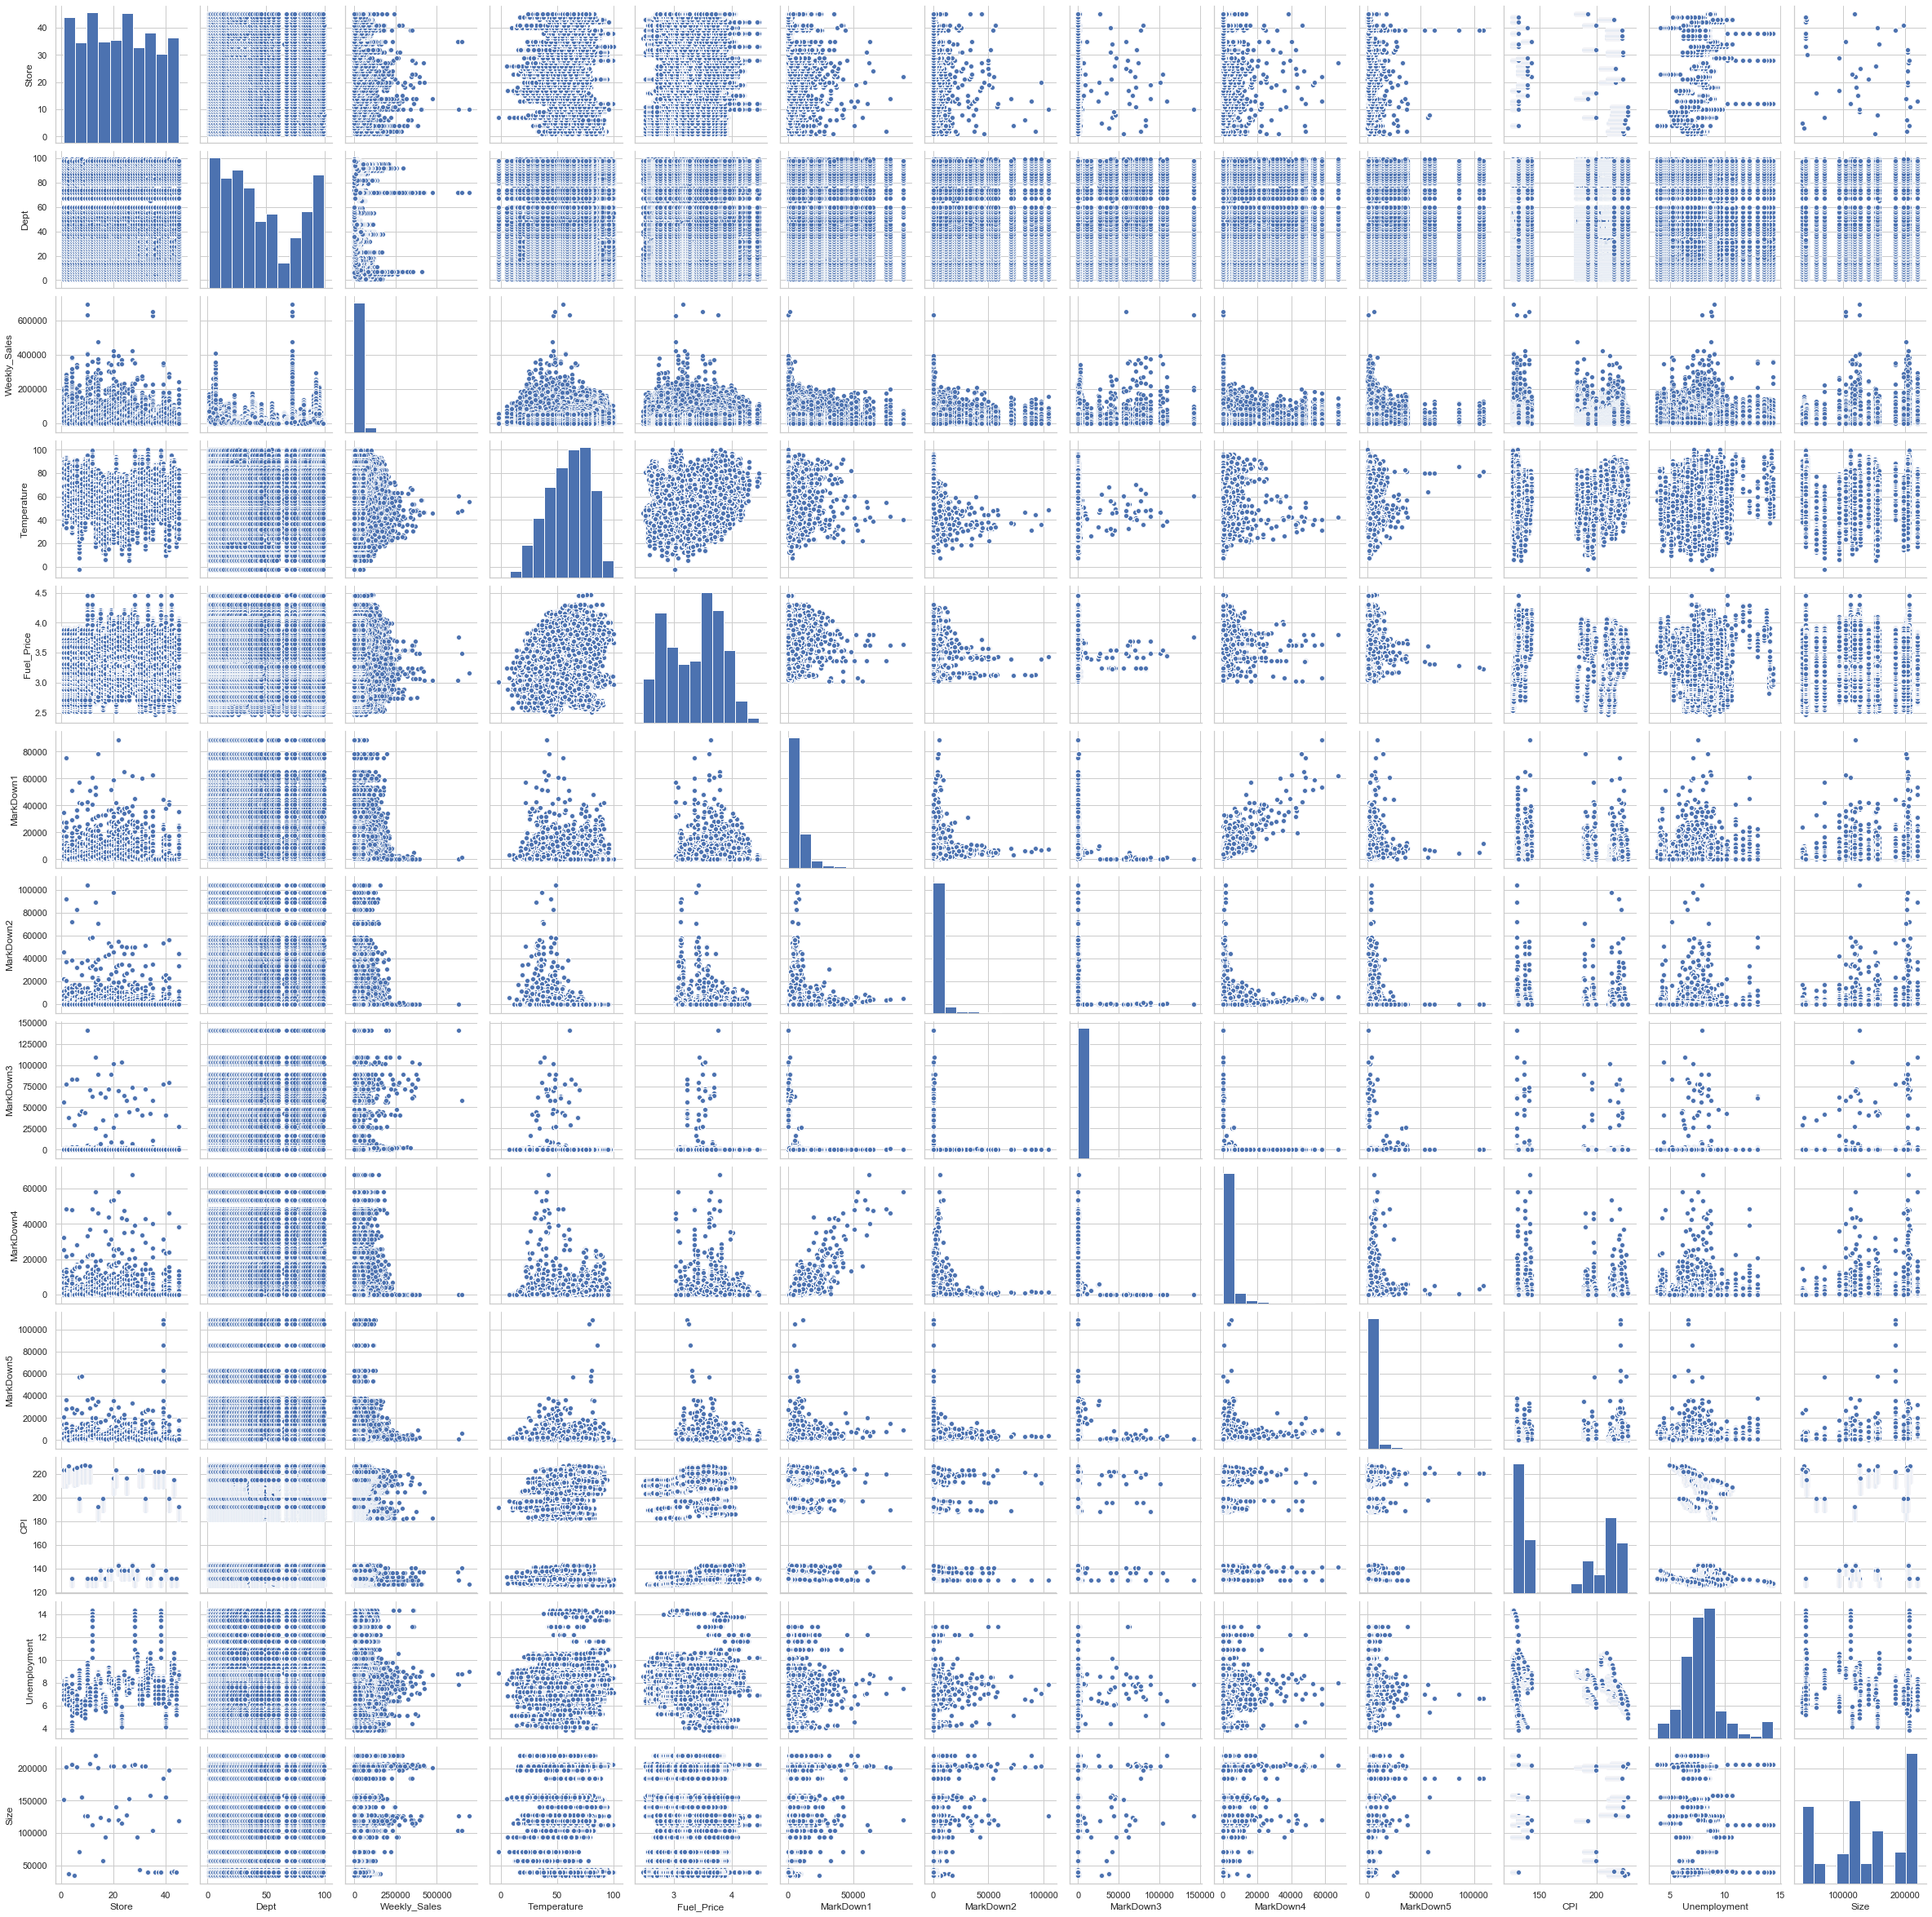

In [130]:
%%time
sns.pairplot(df_merged_train.drop(['Date','Type', 'IsHoliday'],axis=1))

# Modelling

In [146]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

import shap

## Preprocess

In [147]:
df_merged_train['day'] = df_merged_train.Date.dt.day
df_merged_train['month'] = df_merged_train.Date.dt.month

In [148]:
categorical_features = ['Type']